In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import numpy.ma as ma
import matplotlib.colors as colors
from statistics import mode
import pandas as pd
from scipy import signal
from cartopy.util import add_cyclic_point
from scipy import interpolate
import glob

home_dir = '/glade/work/devond/'
import sys  
sys.path.insert(0, home_dir)

from functions import * 

crs_sp = ccrs.SouthPolarStereo(central_longitude=0)
crs_ll = ccrs.PlateCarree()

In [2]:
### ----- Read ICE SHEET MASK data ----- ###

cesm_mask_file = '/glade/work/devond/AIS_masks/model_masks/CESM_masks.nc'
cesm_masks = xr.open_dataset(cesm_mask_file)
cesm_masks = cesm_masks.sel(lat = slice(-90,-60))
cesm_area = cesm_masks.area.values #grid cell areas
cesm_ism = cesm_masks.full_ism.values
cesm_gism = cesm_masks.grounded_ism.values

cesm_iceshelves = xr.open_dataset('/glade/work/devond/AIS_masks/iceshelfmask_CESM2.nc')
cesm_iceshelves = cesm_iceshelves.sel(latitude = slice(-90,-60))
cesm_shelves = cesm_iceshelves.ism.values
cesm_shelves[cesm_shelves==0]=np.nan

In [70]:
def get_ts(data):
    data = data.sel(lat = slice(-90,-60))
    data = data* cesm_shelves * 3600*24*data.time.dt.days_in_month
    data_ts = data.groupby(data.time.dt.year).sum()
    data_ts=(data_ts * cesm_area).sum(dim = ['lat','lon'])/(10**12)
    return data_ts

In [71]:
# melt_hist = xr.open_dataset('/glade/work/devond/CESM/melt/CESM2_QSNOMELT_hist.nc')['QSNOMELT']
# melt_hist_ts = get_ts(melt_hist)

melt_ssp1 = xr.open_dataset('/glade/work/devond/CESM/melt/CESM2_QSNOMELT_ICE_SSP1-2.6.nc')['QSNOMELT_ICE']
melt_ssp1_ts = get_ts(melt_ssp1)

melt_ssp3 = xr.open_dataset('/glade/work/devond/CESM/melt/CESM2_QSNOMELT_ICE_SSP3-7.0.nc')['QSNOMELT_ICE']
melt_ssp3_ts = get_ts(melt_ssp3)

melt_ssp5 = xr.open_dataset('/glade/work/devond/CESM/melt/CESM2_QSNOMELT_ICE_SSP5-8.5.nc')['QSNOMELT_ICE']
melt_ssp5_ts = get_ts(melt_ssp5)

In [72]:
# rain_hist = xr.open_dataset('/glade/work/devond/CESM/rain/CESM2_RAIN_hist.nc')['RAIN']
# rain_hist_ts = get_ts(rain_hist)

rain_ssp1 = xr.open_dataset('/glade/work/devond/CESM/rain/CESM2_RAIN_SSP1-2.6_2.nc')['RAIN']
rain_ssp1_ts = get_ts(rain_ssp1)

rain_ssp3 = xr.open_dataset('/glade/work/devond/CESM/rain/CESM2_RAIN_SSP3-7.0_2.nc')['RAIN']
rain_ssp3_ts = get_ts(rain_ssp3)

rain_ssp5 = xr.open_dataset('/glade/work/devond/CESM/rain/CESM2_RAIN_SSP5-8.5_2.nc')['RAIN']
rain_ssp5_ts = get_ts(rain_ssp5)

In [73]:
# runoff_hist = xr.open_dataset('/glade/work/devond/CESM/runoff/CESM2_QRUNOFF_hist2.nc')['QRUNOFF']
# runoff_hist_ts = get_ts(runoff_hist)

runoff_ssp1 = xr.open_dataset('/glade/work/devond/CESM/runoff/CESM2_QRUNOFF_ICE_SSP1-2.6.nc')['QRUNOFF_ICE']
runoff_ssp1_ts = get_ts(runoff_ssp1)

runoff_ssp3 = xr.open_dataset('/glade/work/devond/CESM/runoff/CESM2_QRUNOFF_ICE_SSP3-7.0.nc')['QRUNOFF_ICE']
runoff_ssp3_ts = get_ts(runoff_ssp3)

runoff_ssp5 = xr.open_dataset('/glade/work/devond/CESM/runoff/CESM2_QRUNOFF_ICE_SSP5-8.5.nc')['QRUNOFF_ICE']
runoff_ssp5_ts = get_ts(runoff_ssp5)

In [74]:
# refreeze_hist = xr.open_dataset('/glade/work/devond/CESM/refreeze/CESM2_QSNOFRZ_hist2.nc')['QSNOFRZ']
# refreeze_hist_ts = get_ts(refreeze_hist)

refreeze_ssp1 = xr.open_dataset('/glade/work/devond/CESM/refreeze/CESM2_QSNOFRZ_ICE_SSP1-2.6.nc')['QSNOFRZ_ICE']
refreeze_ssp1_ts = get_ts(refreeze_ssp1)

refreeze_ssp3 = xr.open_dataset('/glade/work/devond/CESM/refreeze/CESM2_QSNOFRZ_ICE_SSP3-7.0.nc')['QSNOFRZ_ICE']
refreeze_ssp3_ts = get_ts(refreeze_ssp3)

refreeze_ssp5 = xr.open_dataset('/glade/work/devond/CESM/refreeze/CESM2_QSNOFRZ_ICE_SSP5-8.5.nc')['QSNOFRZ_ICE']
refreeze_ssp5_ts = get_ts(refreeze_ssp5)

In [75]:
ice_ssp1 = xr.open_dataset('/glade/work/devond/CESM/ice/CESM2_QICE_MELT_SSP1-2.6.nc')['QICE_MELT']
ice_ssp1_ts = get_ts(ice_ssp1)

ice_ssp3 = xr.open_dataset('/glade/work/devond/CESM/ice/CESM2_QICE_MELT_SSP3-7.0.nc')['QICE_MELT']
ice_ssp3_ts = get_ts(ice_ssp3)

ice_ssp5 = xr.open_dataset('/glade/work/devond/CESM/ice/CESM2_QICE_MELT_SSP5-8.5.nc')['QICE_MELT']
ice_ssp5_ts = get_ts(ice_ssp5)

In [76]:
#refreeze_hist_ratio = refreeze_hist_ts/(melt_hist_ts+rain_hist_ts)*100
refreeze_ssp1_ratio = refreeze_ssp1_ts/(melt_ssp1_ts+rain_ssp1_ts+ice_ssp1_ts)*100
refreeze_ssp3_ratio = refreeze_ssp3_ts/(melt_ssp3_ts+rain_ssp3_ts+ice_ssp3_ts)*100
refreeze_ssp5_ratio = refreeze_ssp5_ts/(melt_ssp5_ts+rain_ssp5_ts+ice_ssp5_ts)*100

#runoff_hist_ratio = (runoff_hist2_ts)/(melt_hist_ts+rain_hist_ts)*100
runoff_ssp1_ratio = runoff_ssp1_ts/(melt_ssp1_ts+rain_ssp1_ts+ice_ssp1_ts)*100
runoff_ssp3_ratio = runoff_ssp3_ts/(melt_ssp3_ts+rain_ssp3_ts+ice_ssp3_ts)*100
runoff_ssp5_ratio = runoff_ssp5_ts/(melt_ssp5_ts+rain_ssp5_ts+ice_ssp5_ts)*100

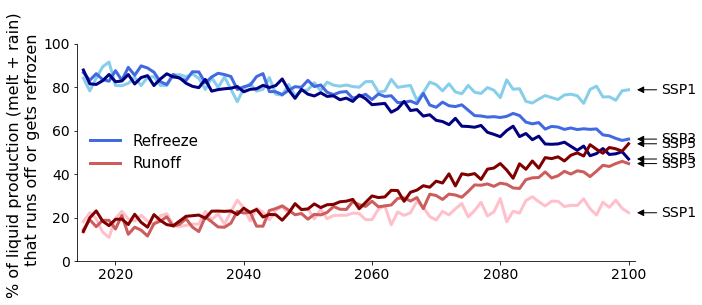

In [77]:
fig, ax = plt.subplots(1,1, figsize = (10,4))

ax.plot(refreeze_ssp1_ts.year, refreeze_ssp1_ratio.mean(dim = 'ensemble'), color = 'skyblue', label = None, linewidth=3)
ax.annotate('SSP1', xy=(2101, refreeze_ssp1_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, refreeze_ssp1_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))
ax.plot(refreeze_ssp3_ts.year, refreeze_ssp3_ratio.mean(dim = 'ensemble'), color = 'royalblue', label = 'Refreeze', linewidth=3)
ax.annotate('SSP3', xy=(2101, refreeze_ssp3_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, refreeze_ssp3_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))
ax.plot(refreeze_ssp5_ts.year, refreeze_ssp5_ratio.mean(dim = 'ensemble'), color = 'navy', label = None, linewidth=3)
ax.annotate('SSP5', xy=(2101, refreeze_ssp5_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, refreeze_ssp5_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))


ax.plot(runoff_ssp1_ts.year, runoff_ssp1_ratio.mean(dim = 'ensemble'), color = 'pink', label = None, linewidth=3)
ax.annotate('SSP1', xy=(2101, runoff_ssp1_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, runoff_ssp1_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))
ax.plot(runoff_ssp3_ts.year, runoff_ssp3_ratio.mean(dim = 'ensemble'), color = 'indianred', label = 'Runoff', linewidth=3)
ax.annotate('SSP3', xy=(2101, runoff_ssp3_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, runoff_ssp3_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))
ax.plot(runoff_ssp5_ts.year, runoff_ssp5_ratio.mean(dim = 'ensemble'), color = 'maroon', label = None, linewidth=3)
ax.annotate('SSP5', xy=(2101, runoff_ssp5_ratio.mean(dim = 'ensemble').isel(year = -1)), xytext=(2105, runoff_ssp5_ratio.mean(dim = 'ensemble').isel(year = -1)),textcoords = 'data',ha='left', va='center',fontsize = 14,arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='black'))

plt.legend(frameon = False,prop={'size': 15})

ax.set_ylabel('% of liquid production (melt + rain) \n that runs off or gets refrozen', fontsize = 16)
ax.set_ylim([0,100])
ax.set_xlim([2014,2101])
ax.set_yticklabels([0,20,40,60,80,100], fontsize = 14)
ax.set_xticks([2020,2040,2060,2080,2100])
ax.set_xticklabels([2020,2040,2060,2080,2100], fontsize = 14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig('runoff_refreeze', dpi = 300, bbox_inches = 'tight', transparent = True)